In [1]:
#The dependecies and libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
#Load in the data to the data frames

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [3]:
#Explore the data

print(train.info())
print(train.describe())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Data clean, found the missing values

missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [6]:
#Data clean, drop in some rows with to many missing values

columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)


In [5]:
#Data clean, fill in some null values

import pandas as pd
import numpy as np


# Fix for filling missing values
for col in train.columns:
    if train[col].dtype == 'object':  # Categorical features
        train[col] = train[col].fillna(train[col].mode()[0])
        if col in test.columns:
            test[col] = test[col].fillna(test[col].mode()[0])
    else:  # Numerical features
        train[col] = train[col].fillna(train[col].median())
        if col in test.columns:
            test[col] = test[col].fillna(test[col].median())

# Encode categorical variables using Label Encoding
label_enc = LabelEncoder()
for col in train.select_dtypes(include='object').columns:
    train[col] = label_enc.fit_transform(train[col])
    if col in test.columns:
        test[col] = label_enc.transform(test[col])


In [8]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [6]:
#Prepare to train Multiple ML models

X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Training Linear Regression...


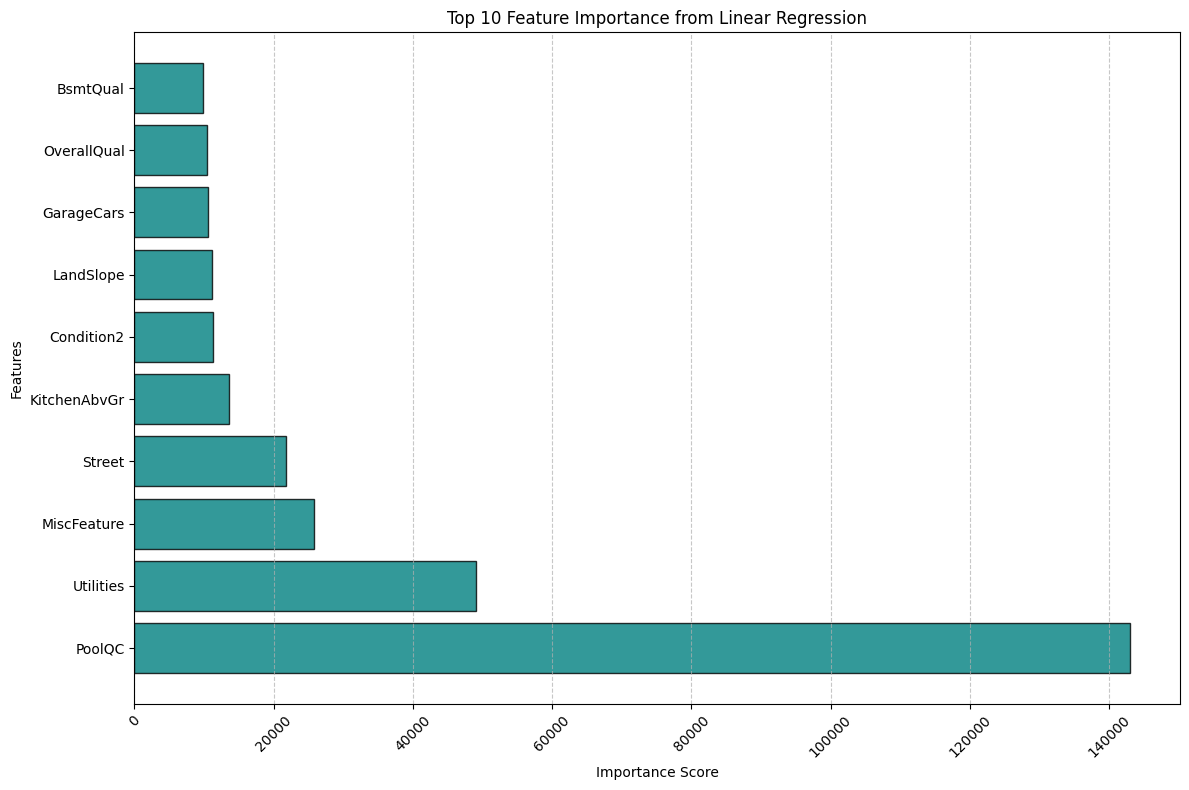

Training Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


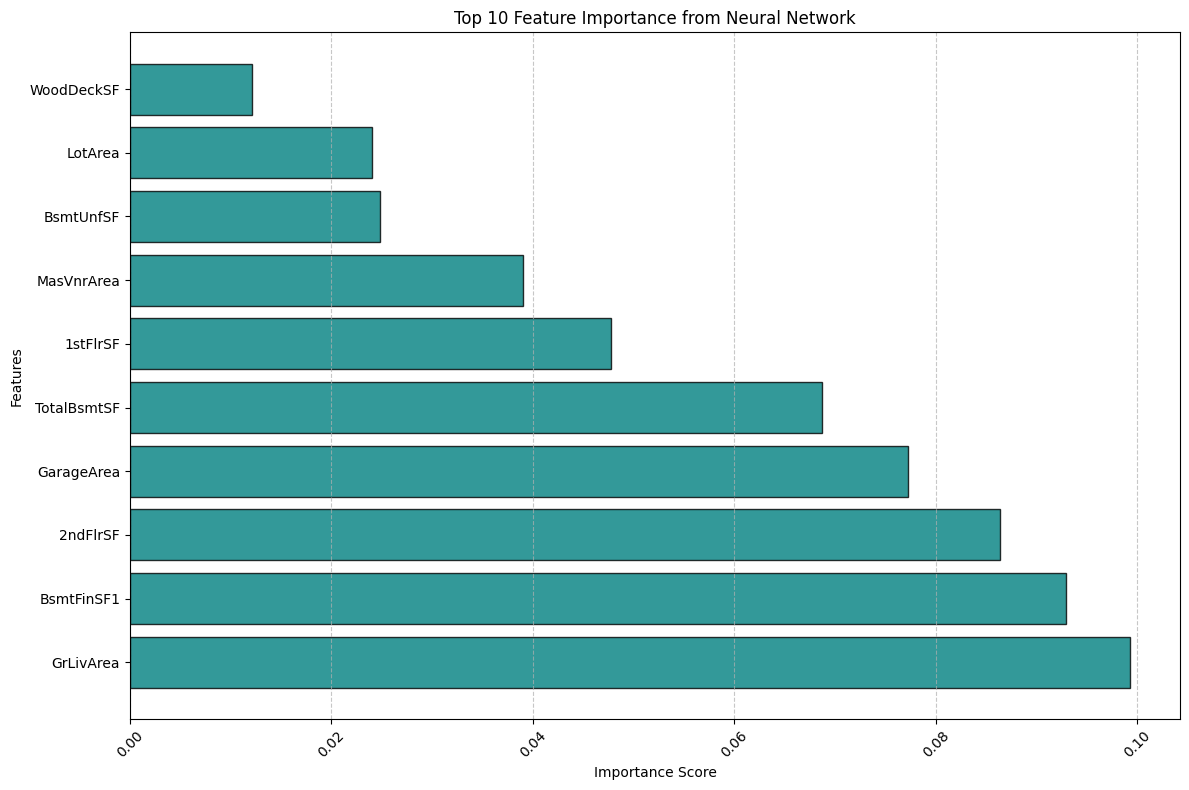

Training Decision Tree...


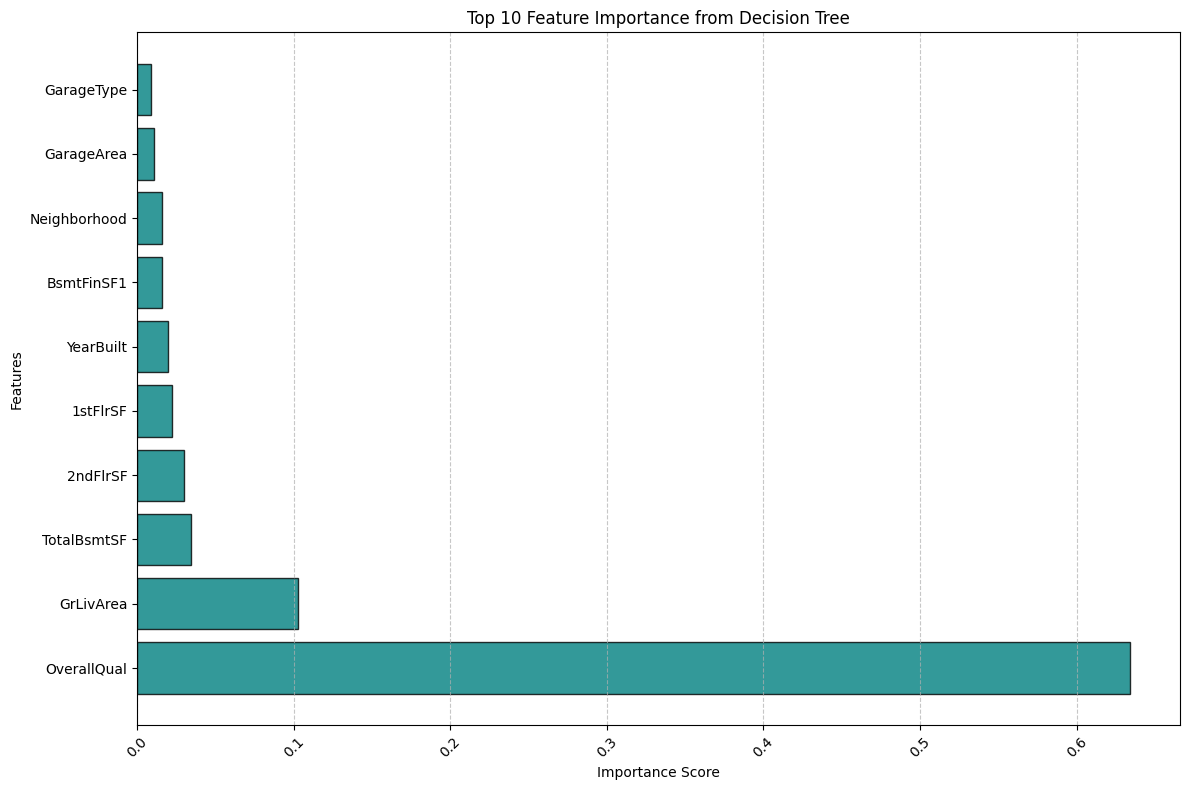

Training Random Forest...


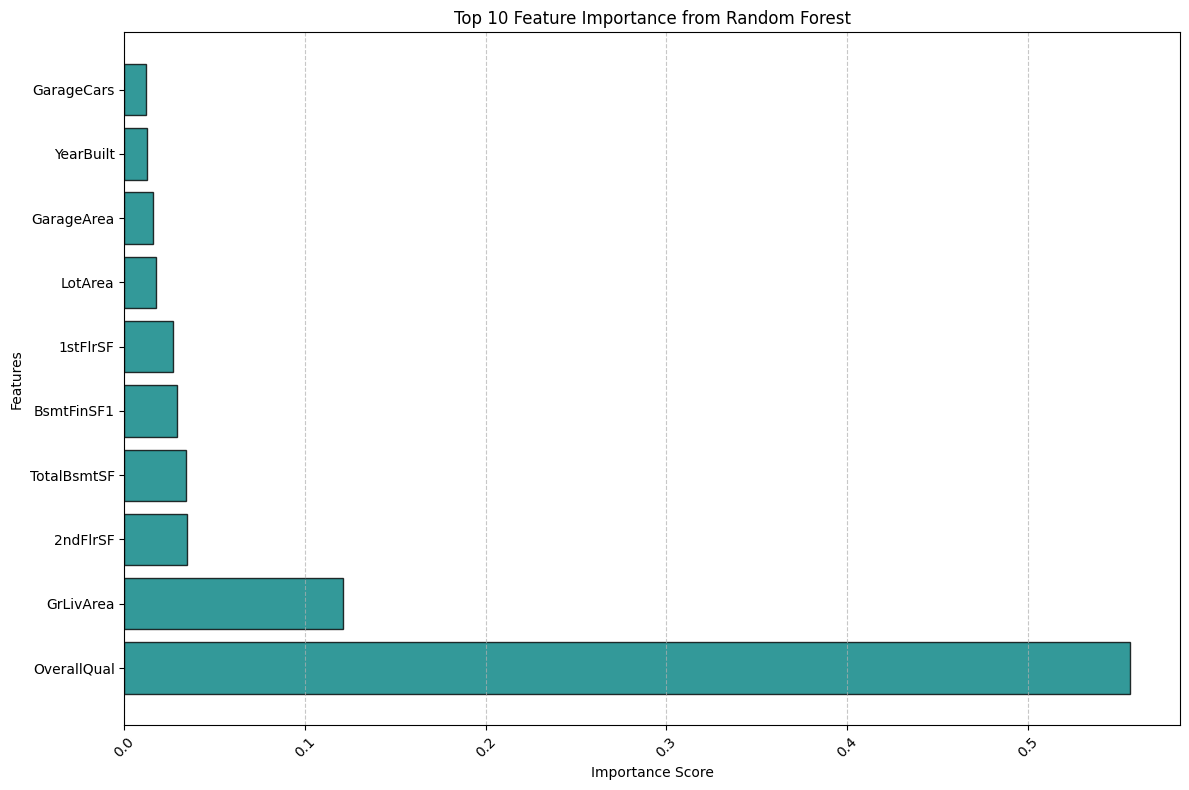

Training Gradient Boosting...


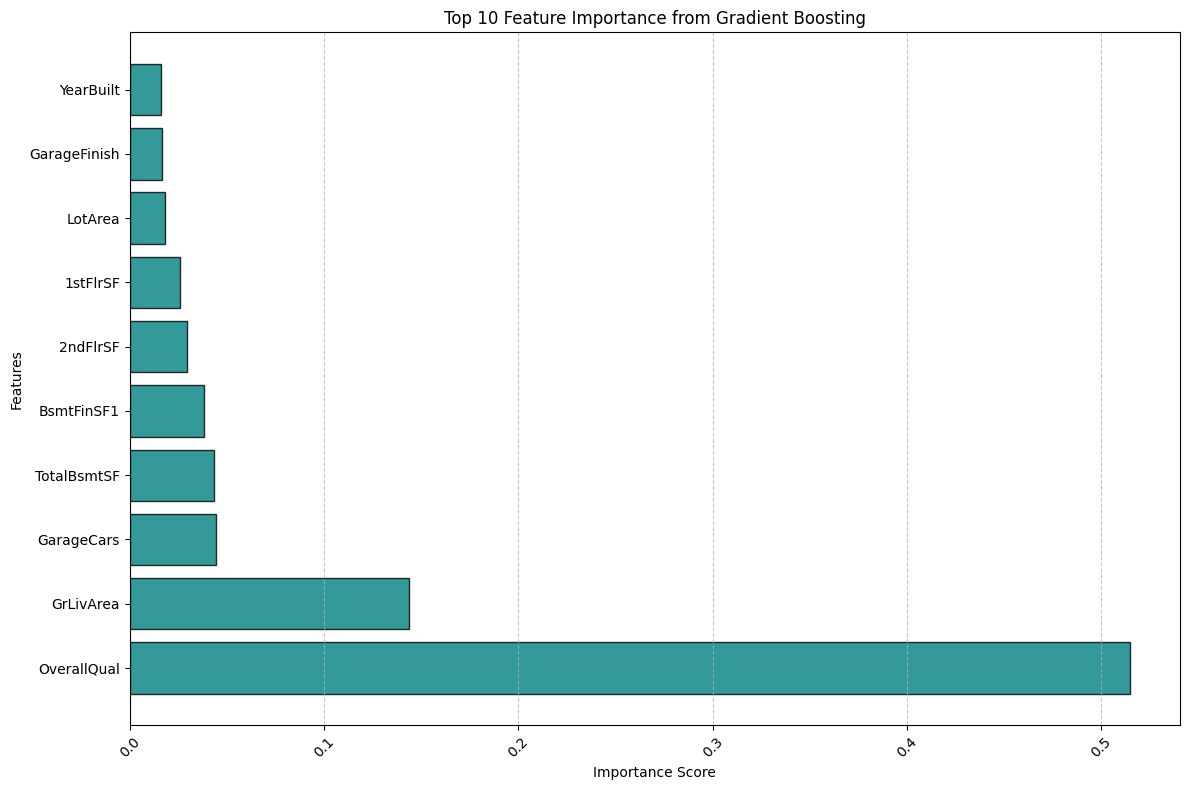

Training XGBoost...


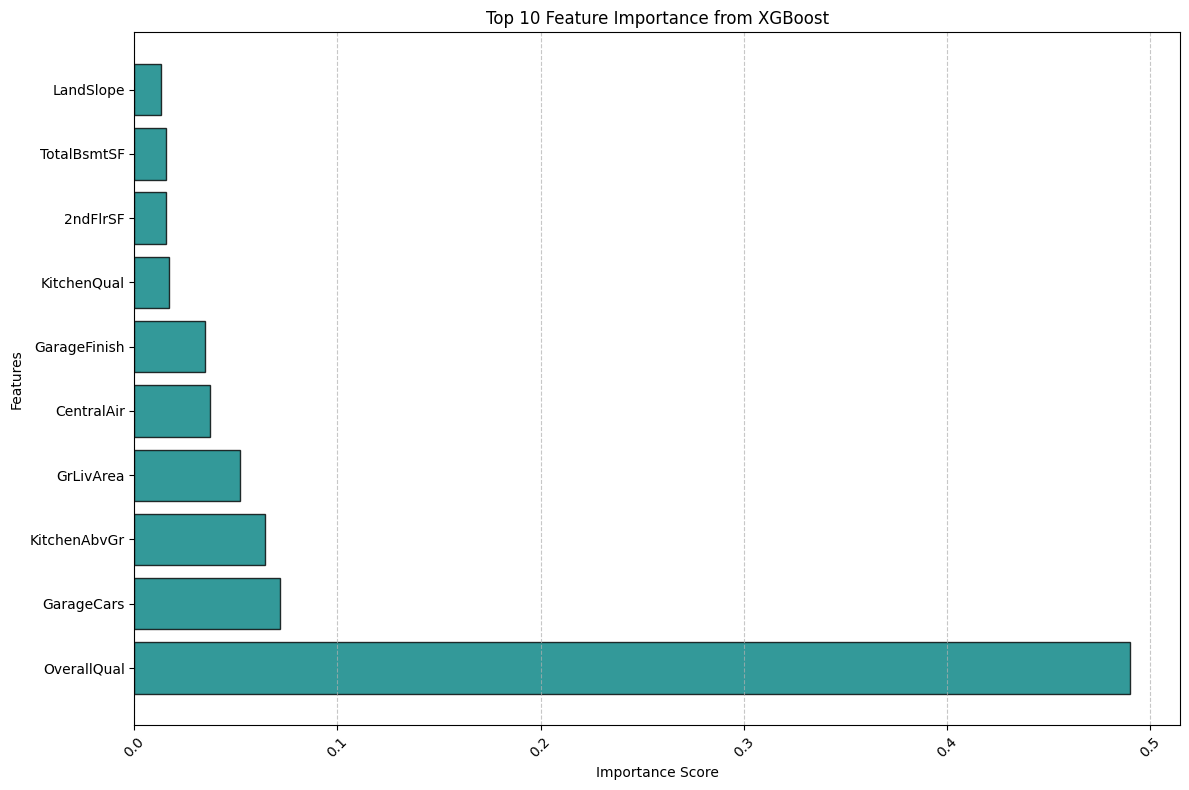

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3364
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 73
[LightGBM] [Info] Start training from score 181441.541952


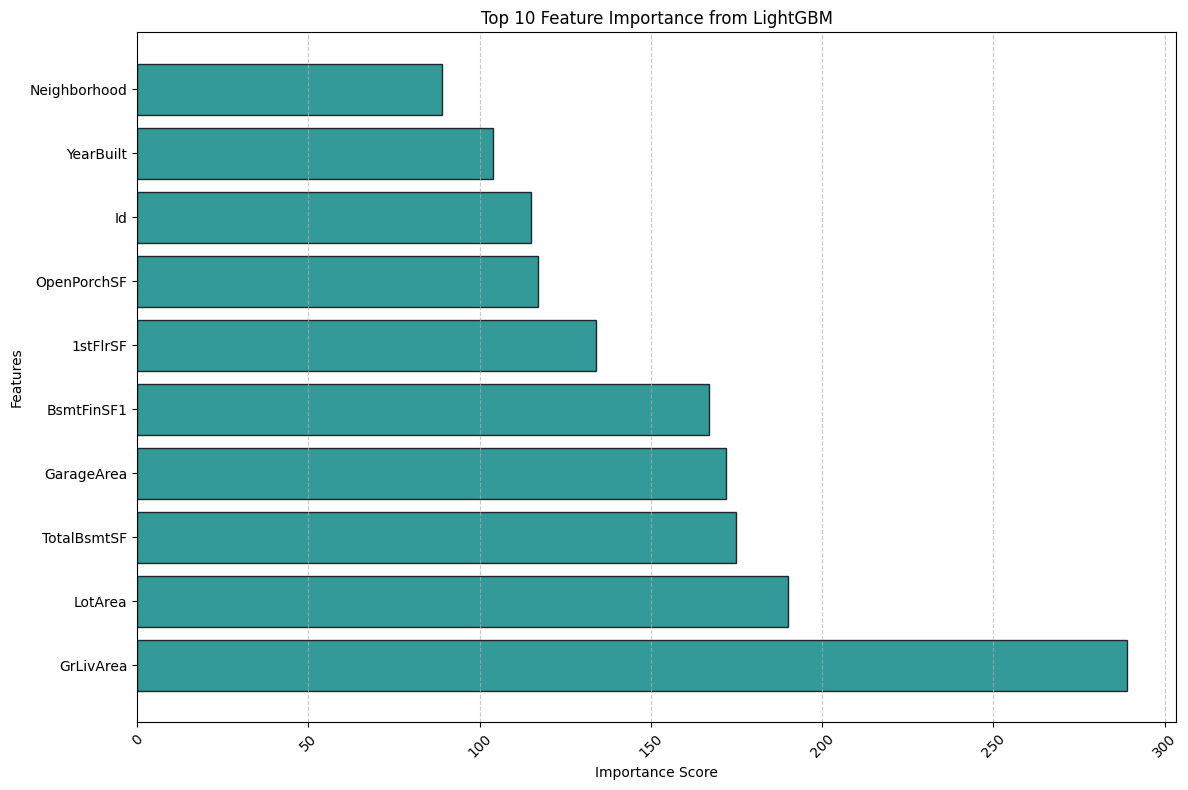

Training CatBoost...


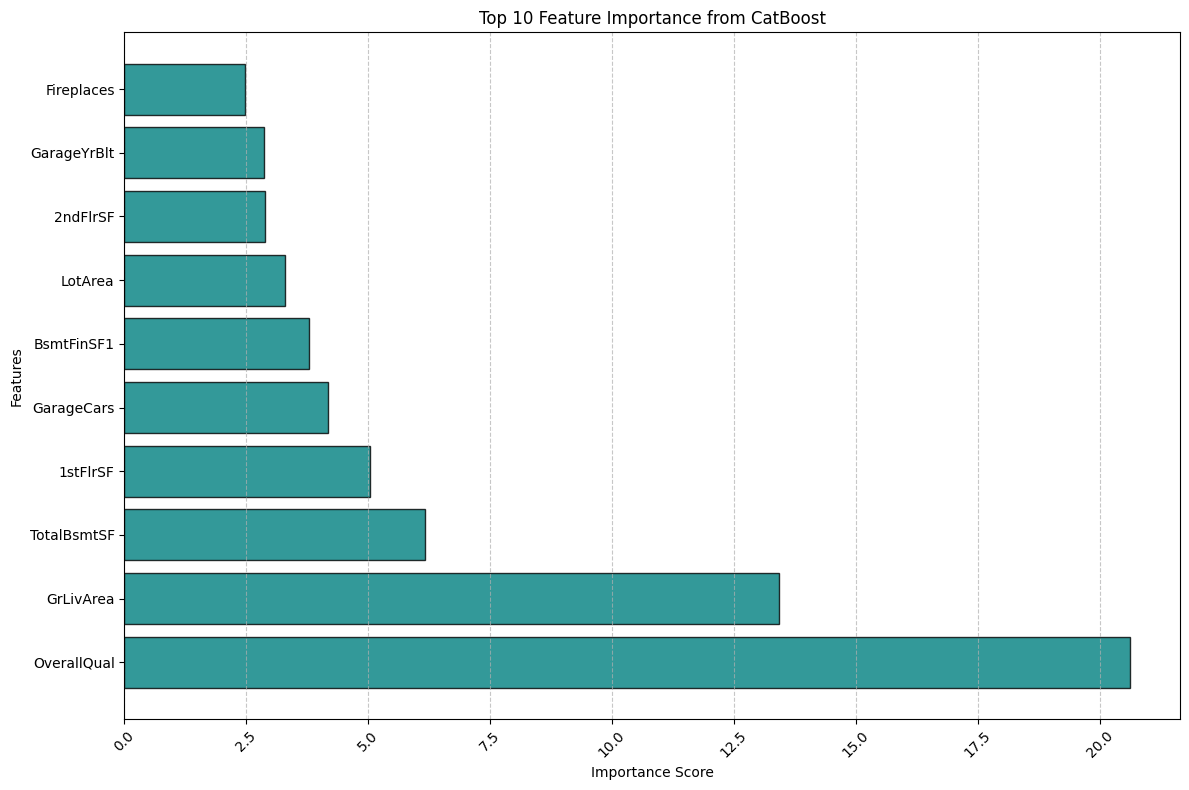

RMSE Results:
Linear Regression: 35344.207068643715
Neural Network: 41727.63144728773
Decision Tree: 41101.118766311774
Random Forest: 29001.533674561608
Gradient Boosting: 29915.75603007662
XGBoost: 27099.198060382318
LightGBM: 28880.649972240873
CatBoost: 26740.285001880085


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=500),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0)
}

# Initialize results dictionary to store RMSE values
results = {}
feature_names = X_train.columns

# Loop through models to train, calculate RMSE, and plot feature importance
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions and calculate RMSE
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse

    # Check if the model has 'feature_importances_' or use coefficients for linear models
    if hasattr(model, 'feature_importances_'):  # Tree-based models, XGBoost, etc.
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):  # Linear models (Linear Regression)
        importances = np.abs(model.coef_)
    else:  
        # Use Permutation Importance for models like Neural Networks
        result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42)
        importances = result.importances_mean

    # Plot the top 10 most important features
    top_n = 10
    sorted_idx = np.argsort(importances)[::-1][:top_n]  # Get indices of top 10 features (descending order)
    
    # Select top features and their importances
    top_features = feature_names[sorted_idx]
    top_importances = importances[sorted_idx]

    plt.figure(figsize=(12, 8))  # Increase figure size for better readability
    plt.barh(top_features, top_importances, color='teal', edgecolor='black', alpha=0.8)
    plt.title(f"Top 10 Feature Importance from {name}")
    plt.xlabel('Importance Score')
    plt.ylabel('Features')

    # Rotate y-axis labels to avoid overlap
    plt.yticks(rotation=0)  # Horizontal labels
    plt.xticks(rotation=45)  # Optional: Rotate x-axis ticks for better clarity if needed

    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Ensure the plot fits nicely without clipping
    plt.tight_layout()
    plt.show()

# Optionally, display RMSE results for comparison
print("RMSE Results:")
for model_name, rmse in results.items():
    print(f"{model_name}: {rmse}")


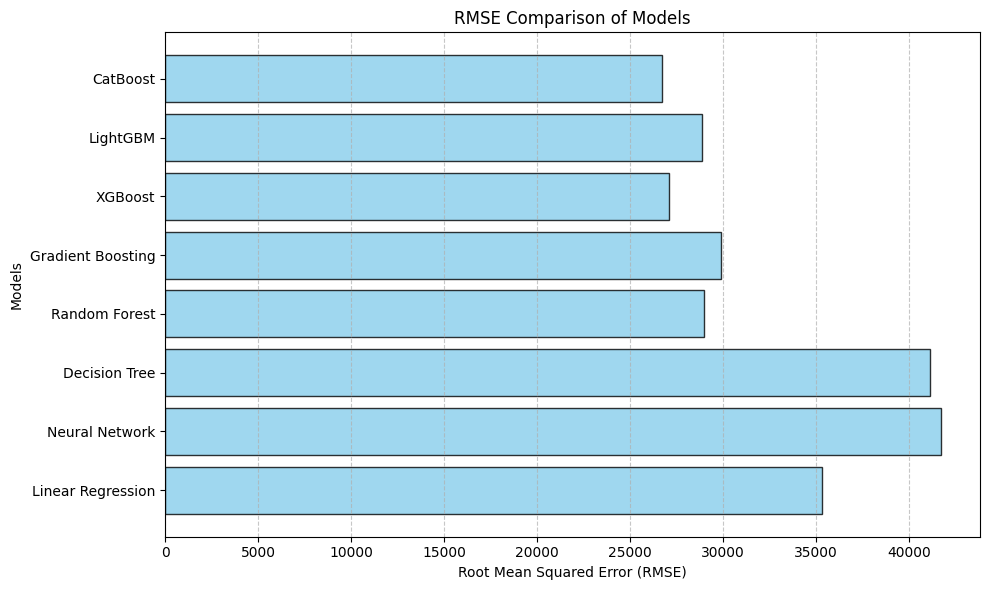

In [9]:
# Create a bar plot for RMSE comparison
model_names = list(results.keys())
rmse_values = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('RMSE Comparison of Models')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# Log-transform skewed numerical features
skewed_features = train.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.75].index

for feature in high_skew:
    if feature != "SalePrice":  # Avoid transforming the target variable here
        train[feature] = np.log1p(train[feature])

# Create new features
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['Age'] = train['YrSold'] - train['YearBuilt']
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']

# Encode categorical variables using one-hot encoding
train = pd.get_dummies(train, drop_first=True)

# Log-transform the target variable (SalePrice)
train['SalePrice'] = np.log1p(train['SalePrice'])

# Save processed training data for further use
train.to_csv('train_feature_engineered.csv', index=False)

print("Feature engineering on training dataset completed.")




Feature engineering on training dataset completed.


In [11]:
for feature in high_skew:
    if feature in test.columns:  # Ensure the feature exists in the test set
        test[feature] = np.log1p(test[feature])

# Create new features (same as in training data)
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['Age'] = test['YrSold'] - test['YearBuilt']
test['RemodAge'] = test['YrSold'] - test['YearRemodAdd']

# Encode categorical variables using one-hot encoding
test = pd.get_dummies(test, drop_first=True)

# Align columns between training and test datasets (add missing columns to test set)
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    if col != 'SalePrice':  # Exclude target column from alignment
        test[col] = 0

# Reorder columns to match training data (excluding SalePrice)
test = test[train.drop(['SalePrice'], axis=1).columns]

# Save processed test data for further use
test.to_csv('test_feature_engineered.csv', index=False)

print("Feature engineering on test dataset completed.")

Feature engineering on test dataset completed.


In [165]:
#Retrain the models with the feature engineering

# Load processed training dataset
train = pd.read_csv('/kaggle/working/train_feature_engineered.csv')

# Split features and target variable
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'Neural Network': MLPRegressor(random_state=42, max_iter=500),
}

# Train models and evaluate RMSE on validation set
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse

# Display RMSE results for all models after feature engineering
print("\nModel Performance After Feature Engineering (RMSE):")
for model_name, rmse in results.items():
    print(f"{model_name}: {rmse:.4f}")


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3772
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 73
[LightGBM] [Info] Start training from score 12.030658
Training CatBoost...
Training Neural Network...

Model Performance After Feature Engineering (RMSE):
Linear Regression: 0.1429
Decision Tree: 0.2107
Random Forest: 0.1436
Gradient Boosting: 0.1374
XGBoost: 0.1461
LightGBM: 0.1389
CatBoost: 0.1297
Neural Network: 0.7919


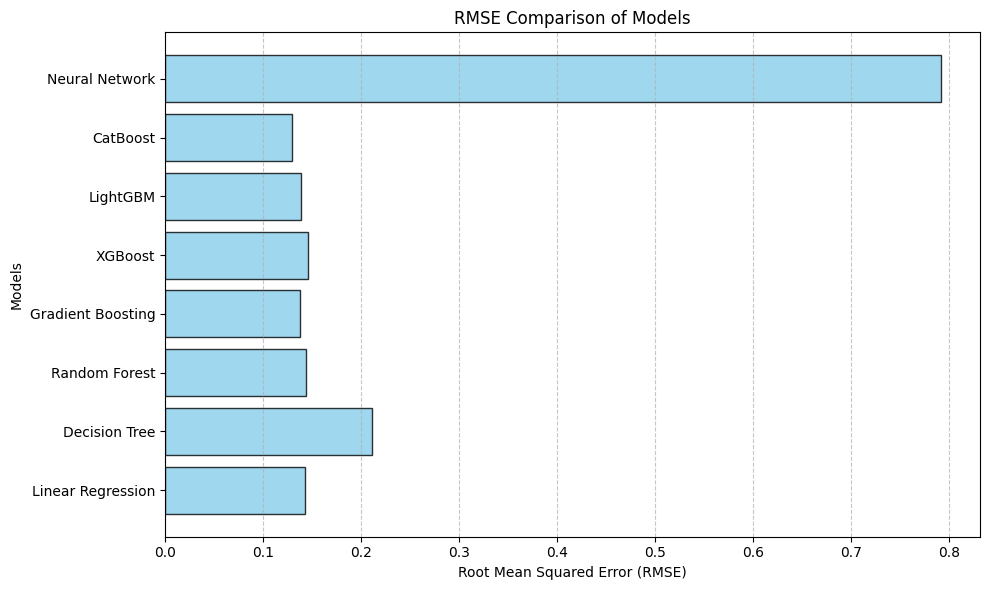

In [166]:
# Create a bar plot for RMSE comparison
model_names = list(results.keys())
rmse_values = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('RMSE Comparison of Models')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [167]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Target variable and features
y = train['SalePrice']
X = train.drop(['SalePrice', 'Id'], axis=1)
test_ids = test['Id']
X_test = test.drop(['Id'], axis=1)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [168]:
# Preprocessing for numerical data: Impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [169]:
# Define the model (XGBoost)
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model)])

In [170]:
# Split training data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data and evaluate on validation data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

# Evaluate using Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_error(np.log1p(y_valid), np.log1p(y_pred)))
print(f"Validation RMSLE: {rmsle}")

Validation RMSLE: 0.13907341614063864


In [171]:
# Train on full dataset and make predictions on test set
pipeline.fit(X, y)
test_preds = pipeline.predict(X_test)

# Create submission file
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_preds})
submission.to_csv('submission.csv', index=False)

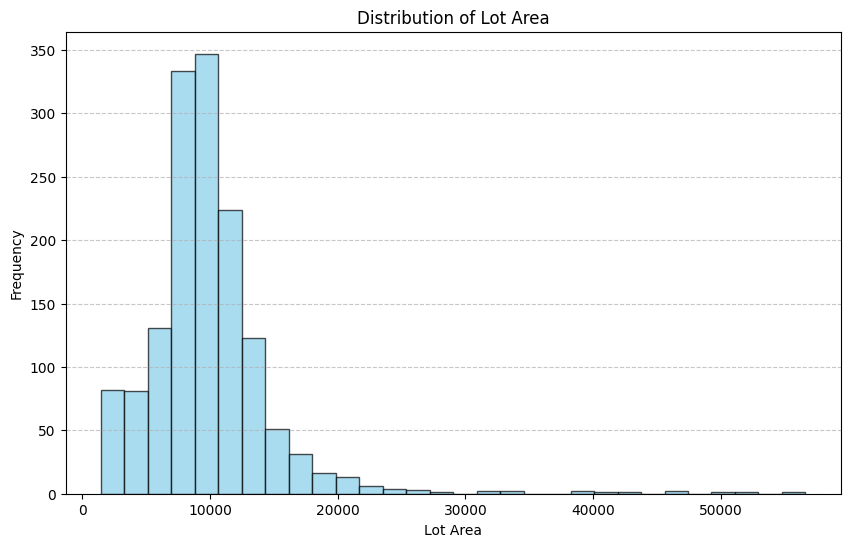

In [172]:
import matplotlib.pyplot as plt

data = test

# Plot 1: Histogram for LotArea
plt.figure(figsize=(10, 6))
plt.hist(data['LotArea'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

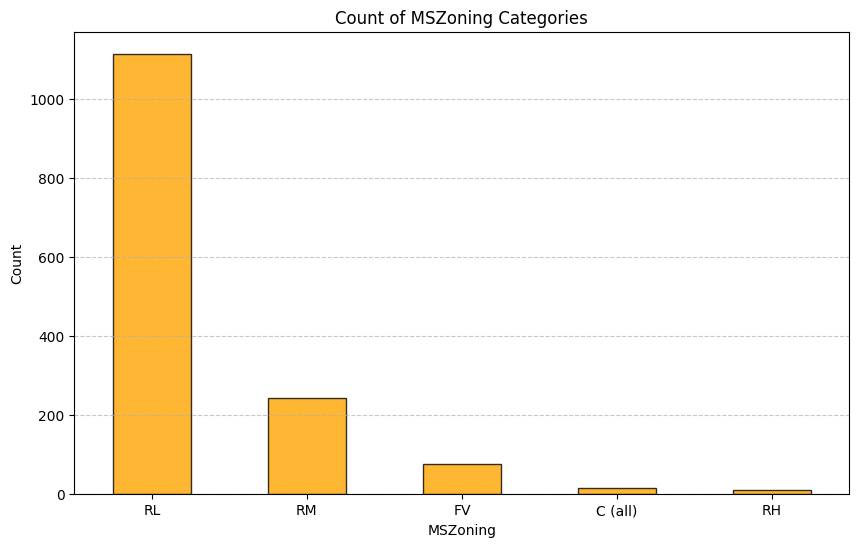

In [173]:
# Plot 2: Bar chart for MSZoning
plt.figure(figsize=(10, 6))
data['MSZoning'].value_counts().plot(kind='bar', color='orange', edgecolor='black', alpha=0.8)
plt.title('Count of MSZoning Categories')
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [174]:
# Reflection

"""
   For future ML assignments, I want to be able to use accurate hyper-parameter
   tuning. For this assignment, data cleaning, feature engineering and
   basic modeling was good. Hyper-parameter, I want to learn more in depth
   and understand it's purpose so for next time, I can tune it to it's best
   possible score. Additionally, I want to be able to combine models. I want
   to be able to use a library ChatGPT mentioned where you can combine models.
   Combing models (for example my top two scores) could help me achieve better
   accuracy.
"""

"\n   For future ML assignments, I want to be able to use accurate hyper-parameter\n   tuning. For this assignment, data cleaning, feature engineering and\n   basic modeling was good. Hyper-parameter, I want to learn more in depth\n   and understand it's purpose so for next time, I can tune it to it's best\n   possible score. Additionally, I want to be able to combine models. I want\n   to be able to use a library ChatGPT mentioned where you can combine models.\n   Combing models (for example my top two scores) could help me achieve better\n   accuracy.\n"